<a href="https://colab.research.google.com/github/ChaitanyaQR/Healthcare/blob/main/DiabetesDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_train= pd.read_csv("DataSet.csv")
df_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


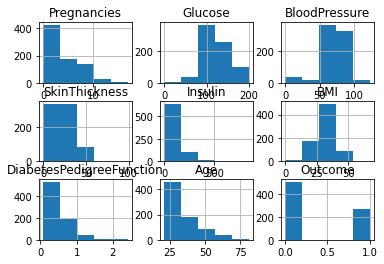

In [ ]:
hist = df_train.hist(bins=5)

In [ ]:
#Count 0 values in each columns
(df_train==0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [ ]:
# Replacing 0/Missing values 
# For Glucose and BMI counts are relatively lower so we will replace it with median values
# For other columns counts are relatively higher so we will replace it with Random samples or else we can drom the column
#data['artist_hotness']=data.artist_hotness.mask(data.artist_hotness == 0,mean_artist_hotness)

def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].mask(df[variable] == 0,median)
    

In [ ]:
def impute_nan_random(df,variable):
    df[variable+"_random"]=df[variable]
    ##It will have the random sample to fill the na
    df_nun=df[(df[[variable]] != 0).all(axis=1)]
    df_nun.head()
    random_sample=df_nun.sample((df[variable]==0).sum(),random_state=0)
    ##pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable]==0].index
    #return random_sample.index.count()
    df.loc[(df[variable]==0),variable+'_random']=random_sample

In [ ]:
median=df_train.Glucose.median()
impute_nan(df_train,"Glucose",median)
median_bmi=df_train.BMI.median()
impute_nan(df_train,"BMI",median_bmi)

In [ ]:
impute_nan_random(df_train,'BloodPressure')
impute_nan_random(df_train,'SkinThickness')
impute_nan_random(df_train,'Insulin')


In [ ]:
df_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Glucose_median,BMI_median,BloodPressure_random,SkinThickness_random,Insulin_random
0,6,148,72,35,0,33.6,0.627,50,1,148.0,33.6,72,35,370
1,1,85,66,29,0,26.6,0.351,31,0,85.0,26.6,66,29,76
2,8,183,64,0,0,23.3,0.672,32,1,183.0,23.3,64,31,63
3,1,89,66,23,94,28.1,0.167,21,0,89.0,28.1,66,23,94
4,0,137,40,35,168,43.1,2.288,33,1,137.0,43.1,40,35,168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,101.0,32.9,76,48,180
764,2,122,70,27,0,36.8,0.340,27,0,122.0,36.8,70,27,77
765,5,121,72,23,112,26.2,0.245,30,0,121.0,26.2,72,23,112
766,1,126,60,0,0,30.1,0.349,47,1,126.0,30.1,60,44,165


In [ ]:
df_train.drop(['Glucose','BloodPressure','SkinThickness','Insulin','BMI'],axis=1,inplace=True)
(df_train==0).sum()

Pregnancies                 111
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
Glucose_median                0
BMI_median                    0
BloodPressure_random          0
SkinThickness_random          0
Insulin_random                0
dtype: int64

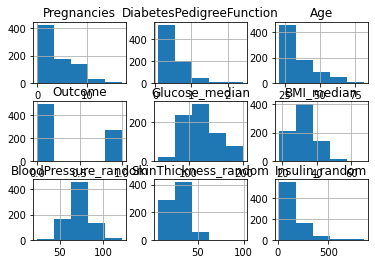

In [ ]:
hist = df_train.hist(bins=5)

In [ ]:
df_train.value_counts()

Pregnancies  DiabetesPedigreeFunction  Age  Outcome  Glucose_median  BMI_median  BloodPressure_random  SkinThickness_random  Insulin_random
17           0.817                     47   1        163.0           40.9        72                    41                    114               1
15           0.153                     43   1        136.0           37.1        70                    32                    110               1
2            0.167                     29   0        139.0           25.6        75                    27                    64                1
             0.166                     25   0        87.0            32.7        58                    16                    52                1
             0.158                     53   1        197.0           30.5        70                    45                    543               1
                                                                                                                                       

In [ ]:
Positive = df_train[df_train['Outcome']==1]
Positive.head(5)

,Pregnancies,DiabetesPedigreeFunction,Age,Outcome,Glucose_median,BMI_median,BloodPressure_random,SkinThickness_random,Insulin_random
0,6,0.627,50,1,148.0,33.6,72,35,370
2,8,0.672,32,1,183.0,23.3,64,31,63
4,0,2.288,33,1,137.0,43.1,40,35,168
6,3,0.248,26,1,78.0,31.0,50,32,88
8,2,0.158,53,1,197.0,30.5,70,45,543


In [ ]:
BloodPressure_random = Positive['BloodPressure_random']
Glucose_median = Positive['Glucose_median']
SkinThickness_random = Positive['SkinThickness_random']
Insulin_random = Positive['Insulin_random']
BMI_median = Positive['BMI_median']

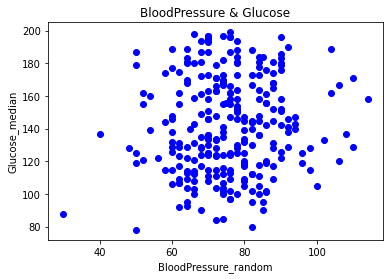

In [ ]:

plt.scatter(BloodPressure_random, Glucose_median, color=['b'])
plt.xlabel('BloodPressure_random')
plt.ylabel('Glucose_median')
plt.title('BloodPressure & Glucose')
plt.show()

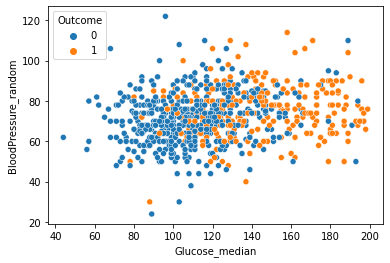

In [ ]:
g =sns.scatterplot(x= "Glucose_median" ,y= "BloodPressure_random",
              hue="Outcome",
              data=df_train);

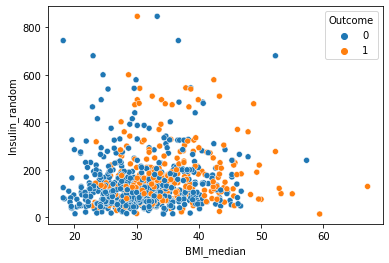

In [ ]:
B =sns.scatterplot(x= "BMI_median" ,y= "Insulin_random",
              hue="Outcome",
              data=df_train);

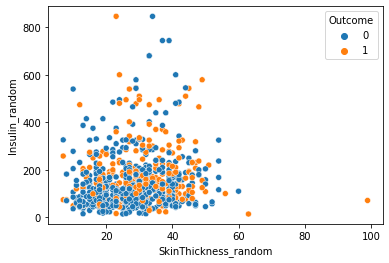

In [ ]:
S =sns.scatterplot(x= "SkinThickness_random" ,y= "Insulin_random",
              hue="Outcome",
              data=df_train);

In [ ]:
df_train.apply(lambda x: x.value_counts()).T.stack()

Pregnancies     0.0      111.0
                1.0      135.0
                2.0      103.0
                3.0       75.0
                4.0       68.0
                         ...  
Insulin_random  579.0      2.0
                600.0      2.0
                680.0      2.0
                744.0      2.0
                846.0      2.0
Length: 1251, dtype: float64

In [ ]:
df_train.apply(pd.value_counts).T.fillna(0)

,0.000,0.078,0.084,0.085,0.088,0.089,0.092,0.096,0.100,0.101,0.102,0.107,0.108,0.115,0.118,0.121,0.122,0.123,0.126,0.127,0.128,0.129,0.130,0.133,0.134,0.135,0.136,0.137,0.138,0.140,0.141,0.142,0.143,0.144,0.145,0.147,0.148,0.149,0.150,0.151,...,278.000,280.000,284.000,285.000,291.000,293.000,300.000,304.000,310.000,318.000,321.000,325.000,326.000,328.000,330.000,335.000,342.000,360.000,370.000,375.000,387.000,392.000,402.000,415.000,440.000,465.000,474.000,478.000,480.000,485.000,495.000,510.000,540.000,543.000,545.000,579.000,600.000,680.000,744.000,846.000
Pregnancies,111.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DiabetesPedigreeFunction,0.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,3.0,3.0,2.0,1.0,1.0,1.0,3.0,1.0,2.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Age,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Outcome,500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Glucose_median,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BMI_median,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BloodPressure_random,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SkinThickness_random,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Insulin_random,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,2.0,4.0,2.0,4.0,2.0,2.0,2.0,2.0,2.0,6.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,4.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0


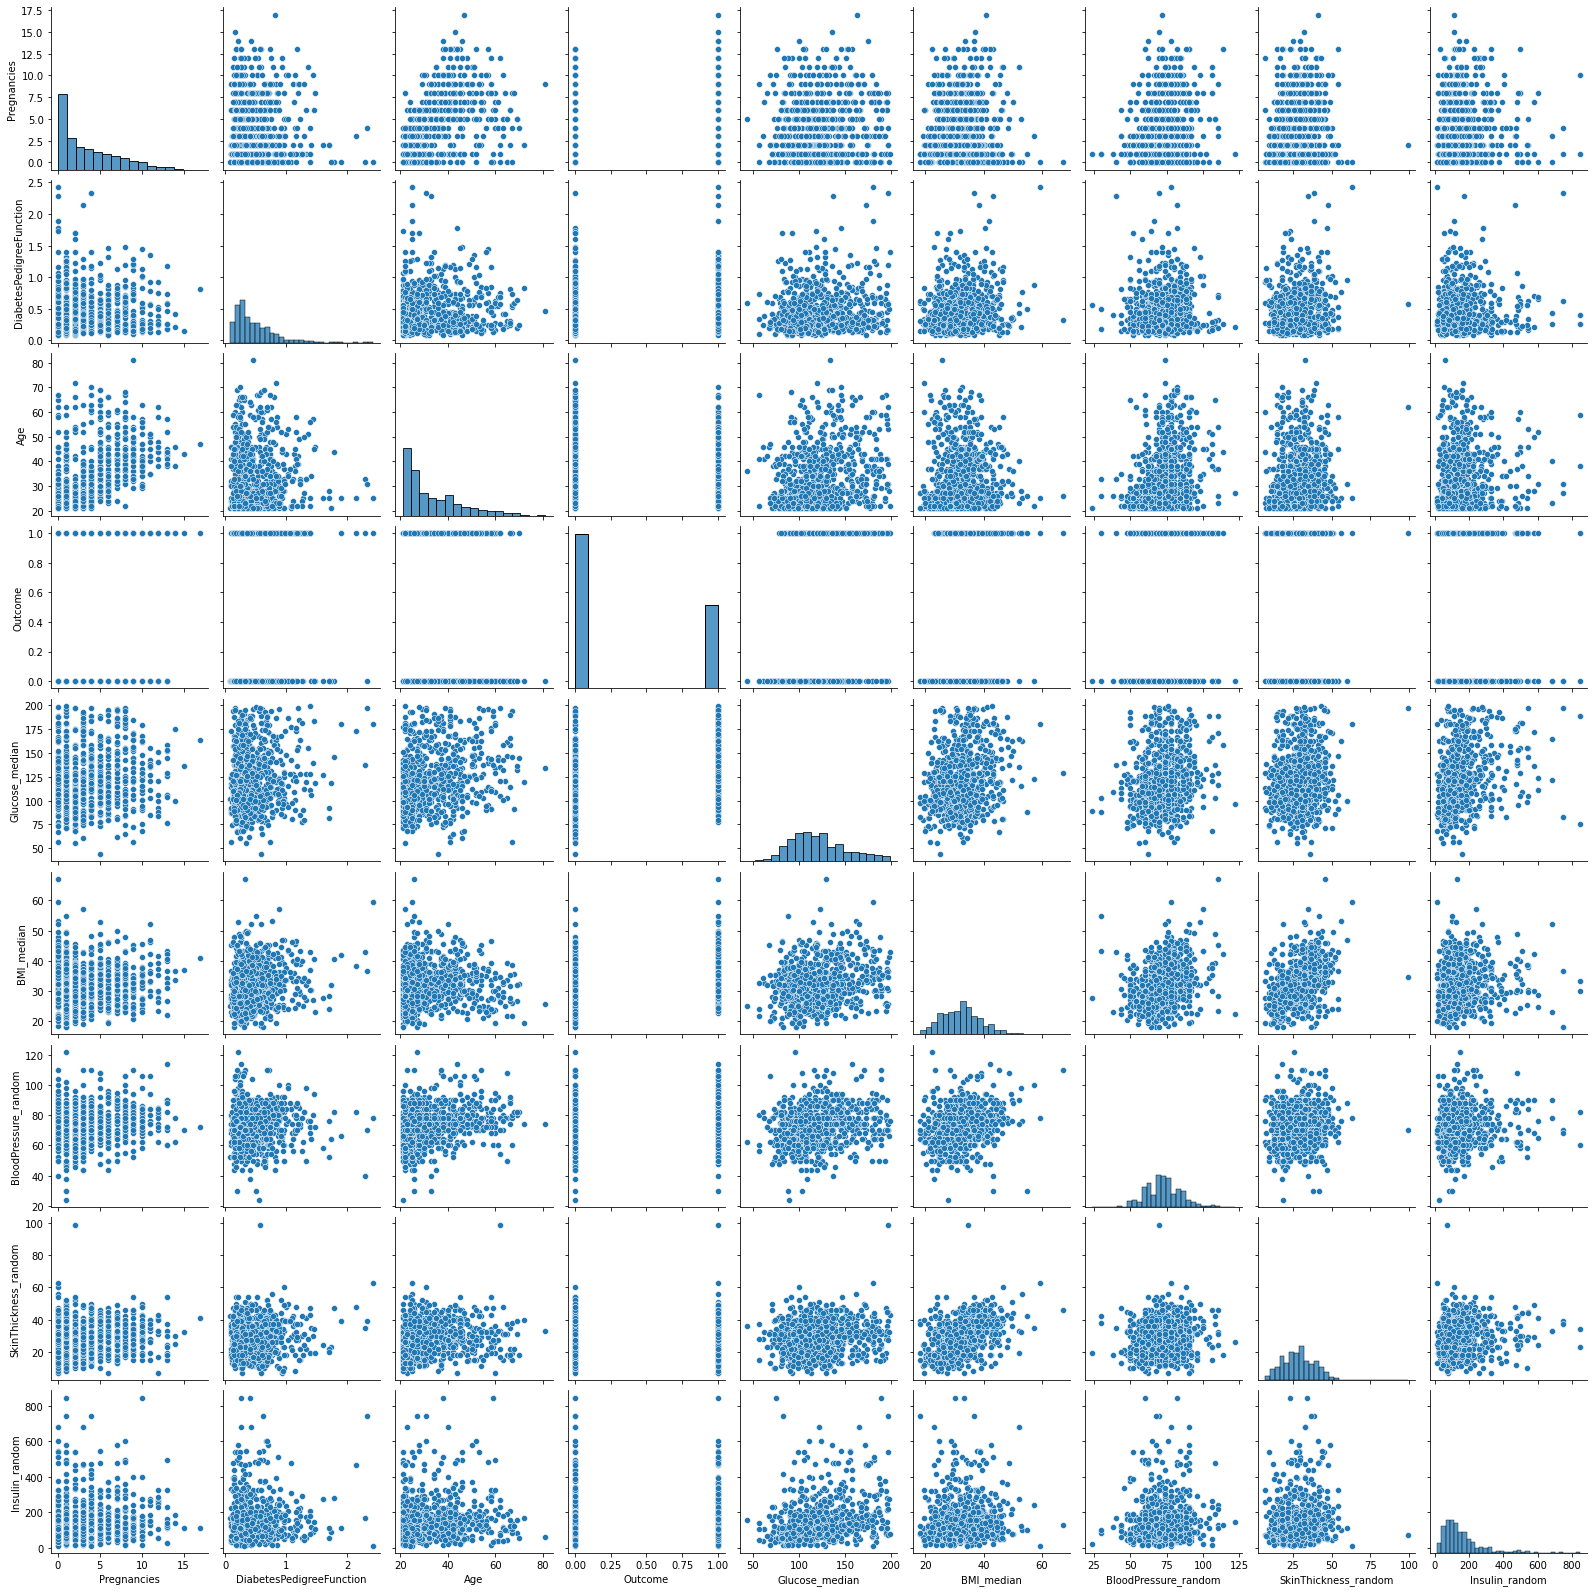

In [ ]:
sns.pairplot(df_train)


In [ ]:
df_train.corr()

,Pregnancies,DiabetesPedigreeFunction,Age,Outcome,Glucose_median,BMI_median,BloodPressure_random,SkinThickness_random,Insulin_random
Pregnancies,1.000000,-0.033523,0.544341,0.221898,0.128213,0.021546,0.196235,0.054769,0.042550
DiabetesPedigreeFunction,-0.033523,1.000000,0.033561,0.173844,0.137327,0.153506,0.000163,0.110730,0.047835
Age,0.544341,0.033561,1.000000,0.238356,0.266909,0.025744,0.309600,0.109235,0.104699
Outcome,0.221898,0.173844,0.238356,1.000000,0.492782,0.312249,0.167794,0.170950,0.144405
Glucose_median,0.128213,0.137327,0.266909,0.492782,1.000000,0.231400,0.212366,0.148237,0.284162
BMI_median,0.021546,0.153506,0.025744,0.312249,0.231400,1.000000,0.265447,0.441247,0.102156
BloodPressure_random,0.196235,0.000163,0.309600,0.167794,0.212366,0.265447,1.000000,0.131250,0.054810
SkinThickness_random,0.054769,0.110730,0.109235,0.170950,0.148237,0.441247,0.131250,1.000000,0.119746
Insulin_random,0.042550,0.047835,0.104699,0.144405,0.284162,0.102156,0.054810,0.119746,1.000000


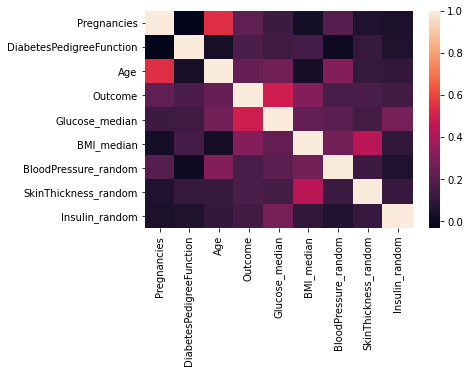

In [ ]:
sns.heatmap(df_train.corr())

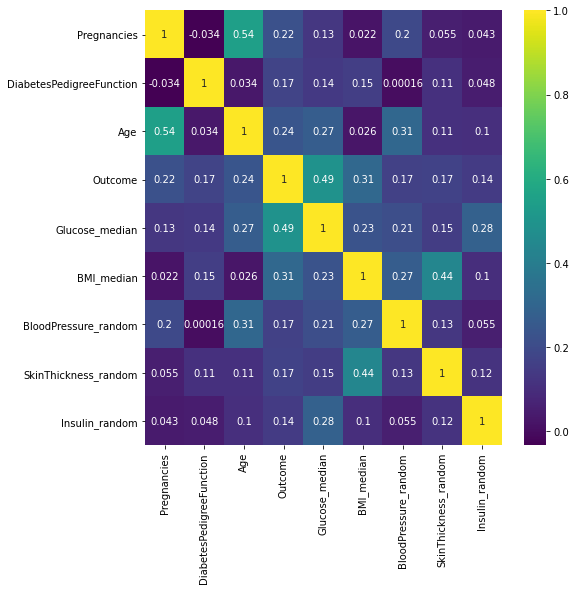

In [ ]:

plt.subplots(figsize=(8,8))
sns.heatmap(df_train.corr(),annot=True,cmap='viridis')  ### gives correlation value

In [ ]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_features = correlation(df_train, 0.75)
len(set(corr_features))

0

In [ ]:
#We have 0 highly corrilated variable
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [ ]:
sc=StandardScaler()

In [ ]:
sc.fit(df_train.drop(['Outcome'],axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
scaled_features= sc.transform(df_train.drop(['Outcome'],axis=1))
scaled_features

array([[ 0.63994726,  0.46849198,  1.4259954 , ..., -0.04686025,
         0.58965887,  1.80970534],
       [-0.84488505, -0.36506078, -0.19067191, ..., -0.52777787,
         0.00882345, -0.67351863],
       [ 1.23388019,  0.60439732, -0.10558415, ..., -0.68808375,
         0.20243526, -0.78332105],
       ...,
       [ 0.3429808 , -0.68519336, -0.27575966, ..., -0.04686025,
        -0.57201196, -0.36945039],
       [-0.84488505, -0.37110101,  1.17073215, ..., -1.0086955 ,
         1.460912  ,  0.07820563],
       [-0.84488505, -0.47378505, -0.87137393, ..., -0.20716612,
         0.20243526, -0.61439425]])

In [ ]:
df = pd.DataFrame(scaled_features,columns=df_train.drop(['Outcome'],axis=1).columns[:])
df.head()

,Pregnancies,DiabetesPedigreeFunction,Age,Glucose_median,BMI_median,BloodPressure_random,SkinThickness_random,Insulin_random
0,0.639947,0.468492,1.425995,0.866045,0.167240,-0.046860,0.589659,1.809705
1,-0.844885,-0.365061,-0.190672,-1.205066,-0.851551,-0.527778,0.008823,-0.673519
2,1.233880,0.604397,-0.105584,2.016662,-1.331838,-0.688084,0.202435,-0.783321
3,-0.844885,-0.920763,-1.041549,-1.073567,-0.633239,-0.527778,-0.572012,-0.521485
4,-1.141852,5.484909,-0.020496,0.504422,1.549885,-2.611754,0.589659,0.103545


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(
    df,
    df_train['Outcome'],
    test_size = 0.25,
    random_state=0
)

In [ ]:
X_train

,Pregnancies,DiabetesPedigreeFunction,Age,Glucose_median,BMI_median,BloodPressure_random,SkinThickness_random,Insulin_random
762,1.530847,-0.996266,-0.020496,-1.073567,-1.448271,-0.848390,-0.378400,-0.301880
127,-0.844885,-0.636871,-0.871374,-0.120198,0.123578,-1.169001,0.686465,-0.521485
564,-1.141852,0.389969,-0.531023,-1.007817,-0.007410,0.594363,-1.152847,-0.715750
375,2.421746,0.169500,2.106697,0.603047,0.982273,0.754669,1.364106,1.429620
663,1.530847,0.498693,0.575118,0.767420,0.793069,0.594363,1.654524,-0.217416
...,...,...,...,...,...,...,...,...
763,1.827813,-0.908682,2.532136,-0.679069,0.065361,0.273752,1.848136,0.204901
192,0.936914,-0.268417,0.234767,1.227667,-0.298493,-0.527778,0.783271,-0.217416
629,0.046014,-0.978145,-1.041549,-0.909193,-1.128080,-0.607931,-0.668818,0.838376
559,2.124780,-0.519087,0.149679,-1.205066,-0.342155,0.113446,0.589659,0.711681


In [ ]:
y_train

762    0
127    0
564    0
375    1
663    1
      ..
763    0
192    1
629    0
559    0
684    0
Name: Outcome, Length: 576, dtype: int64

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

Knn = KNeighborsClassifier(n_neighbors=5,metric='minkowski')

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score,roc_auc_score

In [ ]:
Knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
pred = Knn.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

In [ ]:
print(confusion_matrix(y_test,pred))

[[111  19]
 [ 31  31]]


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

0.7395833333333334

In [ ]:
leaf_size = list(range(1,50))
n_neighbors = list(range(1,50))
p=[1,2]
#convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

In [ ]:
### Staring of XGBoost to compare KNN
import xgboost
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [ ]:
clf = GridSearchCV(Knn, hyperparameters, cv=10)
best_model = clf.fit(X_train,y_train)

In [ ]:
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 1
Best p: 2
Best n_neighbors: 31


In [ ]:
y_pred = best_model.predict(X_test)

In [ ]:
#Check performance using accuracy
print(accuracy_score(y_test, y_pred))
#Check performance using ROC
roc_auc_score(y_test, y_pred)

0.7604166666666666


0.6838709677419356

In [ ]:
print(best_model.score(X_train,y_train))
print(best_model.score(X_test,y_test))

0.7690972222222222
0.7604166666666666


In [ ]:
import pickle
filename = 'finalized_model_knn.pkl'
pickle.dump(best_model, open(filename, 'wb'))

In [ ]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30,0.4,0.5,0.6,0.7,0.8,0.9,1.0 ] ,
 "max_depth"        : [ 1,2,3, 4, 5, 6, 8, 10, 12, 15,20],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ],
 "n_estimators"     : [100,150,200,250]
    
}

In [ ]:
xgboost_class= xgboost.XGBClassifier()

In [ ]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [ ]:
random_search=RandomizedSearchCV(xgboost_class,param_distributions=params,n_iter=50,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)


In [ ]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X_train,y_train)
timer(start_time) # timing ends here for "start_time" variable

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    9.2s



 Time taken: 0 hours 0 minutes and 10.05 seconds.


[Parallel(n_jobs=-1)]: Done 247 out of 250 | elapsed:   10.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   10.0s finished


In [ ]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.3,
              learning_rate=0.3, max_delta_step=0, max_depth=1,
              min_child_weight=1, missing=None, n_estimators=150, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
xgboost_class=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.3,
              learning_rate=0.3, max_delta_step=0, max_depth=1,
              min_child_weight=1, missing=None, n_estimators=150, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
xgboost_class.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.3,
              learning_rate=0.3, max_delta_step=0, max_depth=1,
              min_child_weight=1, missing=None, n_estimators=150, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
XG_pred=xgboost_class.predict(X_test)

In [ ]:
accuracy_score(y_test,XG_pred)

0.7760416666666666

In [ ]:
print(xgboost_class.score(X_train,y_train))
print(xgboost_class.score(X_test,y_test))

0.8350694444444444
0.7760416666666666


In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.7690972222222222
0.7864583333333334


In [ ]:
label = df_train['Outcome']
features = df

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(label,model.predict(features))
cm

array([[441,  59],
       [115, 153]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(label,model.predict(features)))

              precision    recall  f1-score   support

           0       0.79      0.88      0.84       500
           1       0.72      0.57      0.64       268

    accuracy                           0.77       768
   macro avg       0.76      0.73      0.74       768
weighted avg       0.77      0.77      0.77       768



AUC: 0.843


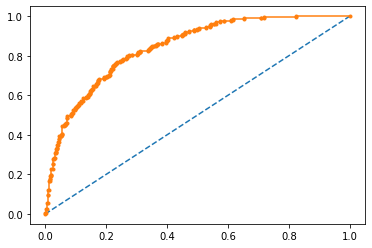

In [ ]:
#Preparing ROC Curve (Receiver Operating Characteristics Curve)
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# predict probabilities
probs = model.predict_proba(features)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(label, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(label, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

In [ ]:
#Applying Decission Tree Classifier
from sklearn.tree import DecisionTreeClassifier
model3 = DecisionTreeClassifier(max_depth=5)
model3.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:

model3.score(X_train,y_train)

0.8333333333333334

In [ ]:

model3.score(X_test,y_test)

0.7708333333333334

In [ ]:
#Applying Random Forest
from sklearn.ensemble import RandomForestClassifier
model4 = RandomForestClassifier(n_estimators=11)
model4.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=11,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
model4.score(X_train,y_train)

0.9878472222222222

In [ ]:
model4.score(X_test,y_test)

0.7604166666666666

In [ ]:
#Support Vector Classifier

from sklearn.svm import SVC 
model5 = SVC(kernel='rbf',
           gamma='auto')
model5.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
model5.score(X_train,y_train)

0.8211805555555556

In [ ]:
model5.score(X_test,y_test)

0.734375

AUC: 0.833
True Positive Rate - [0.         0.00373134 0.00746269 0.01865672 0.04850746 0.07835821
 0.12313433 0.15298507 0.19402985 0.25373134 0.29850746 0.35820896
 0.42537313 0.48507463 0.54104478 0.59328358 0.66044776 0.70149254
 0.7761194  0.83208955 0.87686567 0.9141791  0.93283582 0.95522388
 0.96268657 0.97014925 0.98134328 0.99253731 1.         1.        ], False Positive Rate - [0.    0.    0.    0.004 0.006 0.006 0.008 0.01  0.014 0.022 0.03  0.044
 0.06  0.082 0.118 0.156 0.19  0.228 0.28  0.336 0.39  0.434 0.482 0.55
 0.616 0.676 0.752 0.832 0.934 1.   ] Thresholds - [1.90322581 0.90322581 0.87096774 0.83870968 0.80645161 0.77419355
 0.74193548 0.70967742 0.67741935 0.64516129 0.61290323 0.58064516
 0.5483871  0.51612903 0.48387097 0.4516129  0.41935484 0.38709677
 0.35483871 0.32258065 0.29032258 0.25806452 0.22580645 0.19354839
 0.16129032 0.12903226 0.09677419 0.06451613 0.03225806 0.        ]


Text(0, 0.5, 'True Positive Rate')

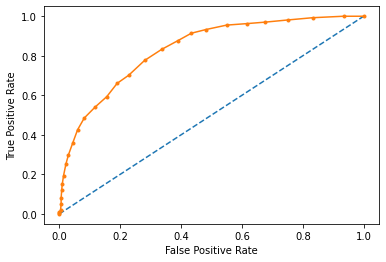

In [ ]:
#Preparing ROC Curve (Receiver Operating Characteristics Curve)
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# predict probabilities
probs = best_model.predict_proba(features)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(label, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(label, probs)
print("True Positive Rate - {}, False Positive Rate - {} Thresholds - {}".format(tpr,fpr,thresholds))
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

f1=0.638 auc=0.721 ap=0.723


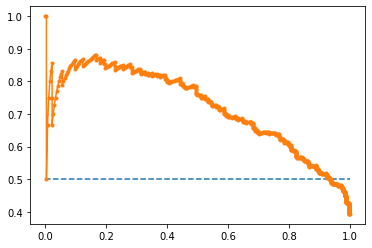

In [ ]:
#Precision Recall Curve for Logistic Regression

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
# predict probabilities
probs = model.predict_proba(features)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# predict class values
yhat = model.predict(features)
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(label, probs)
# calculate F1 score
f1 = f1_score(label, yhat)
# calculate precision-recall AUC
auc = auc(recall, precision)
# calculate average precision score
ap = average_precision_score(label, probs)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))
# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the precision-recall curve for the model
plt.plot(recall, precision, marker='.')

f1=0.592 auc=0.718 ap=0.708


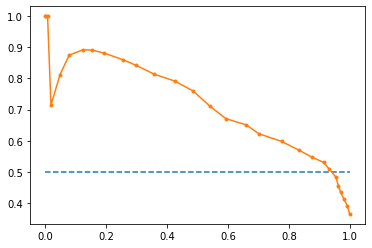

In [ ]:
#Precision Recall Curve for KNN

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
# predict probabilities
probs = best_model.predict_proba(features)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# predict class values
yhat = best_model.predict(features)
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(label, probs)
# calculate F1 score
f1 = f1_score(label, yhat)
# calculate precision-recall AUC
auc = auc(recall, precision)
# calculate average precision score
ap = average_precision_score(label, probs)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))
# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the precision-recall curve for the model
plt.plot(recall, precision, marker='.')

f1=0.756 auc=0.808 ap=0.774


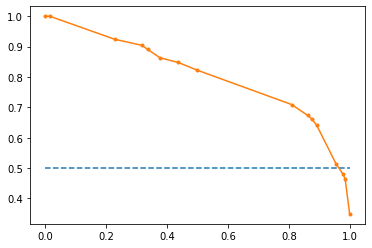

In [ ]:
#Precision Recall Curve for Decission Tree Classifier

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
# predict probabilities
probs = model3.predict_proba(features)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# predict class values
yhat = model3.predict(features)
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(label, probs)
# calculate F1 score
f1 = f1_score(label, yhat)
# calculate precision-recall AUC
auc = auc(recall, precision)
# calculate average precision score
ap = average_precision_score(label, probs)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))
# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the precision-recall curve for the model
plt.plot(recall, precision, marker='.')

f1=0.898 auc=0.954 ap=0.944


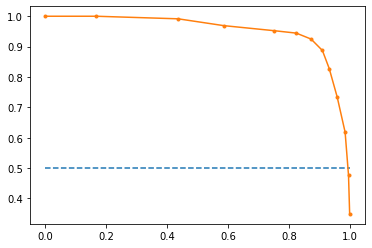

In [ ]:

#Precision Recall Curve for Random Forest

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
# predict probabilities
probs = model4.predict_proba(features)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# predict class values
yhat = model4.predict(features)
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(label, probs)
# calculate F1 score
f1 = f1_score(label, yhat)
# calculate precision-recall AUC
auc = auc(recall, precision)
# calculate average precision score
ap = average_precision_score(label, probs)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))
# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the precision-recall curve for the model
plt.plot(recall, precision, marker='.')

f1=0.725 auc=0.818 ap=0.819


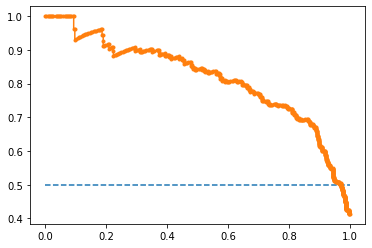

In [ ]:

#Precision Recall Curve for XGBoost

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
# predict probabilities
probs = xgboost_class.predict_proba(features)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# predict class values
yhat = xgboost_class.predict(features)
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(label, probs)
# calculate F1 score
f1 = f1_score(label, yhat)
# calculate precision-recall AUC
auc = auc(recall, precision)
# calculate average precision score
ap = average_precision_score(label, probs)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))
# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the precision-recall curve for the model
plt.plot(recall, precision, marker='.')

In [ ]:
import pickle
filename = 'finalized_model_class.pkl'
pickle.dump(xgboost_class, open(filename, 'wb'))

In [ ]:
import pickle
filename = 'Random_Forest_model.pkl'
pickle.dump(model4, open(filename, 'wb'))

In [ ]:
import pickle
filename = 'Decission_Tree_Classifier_model.pkl'
pickle.dump(model3, open(filename, 'wb'))

In [ ]:

import pickle
filename = 'Logistic_Regression_model.pkl'
pickle.dump(model, open(filename, 'wb'))